# Image Processing Overview

Image processing is a broad field focused on manipulating and analyzing images for various purposes. It is applied to both 2D and 3D images in fields such as computer vision, medical imaging, remote sensing, and multimedia applications.

## Main Objectives

1. **Image Enhancement:**
   - Improving visual quality by adjusting contrast, brightness, and sharpness.
   - Techniques: histogram equalization, contrast stretching, filtering.

2. **Image Restoration:**
   - Removing or reducing effects of noise, blurriness, or degradations.
   - Goal: Recovering the original, undistorted image.

3. **Image Compression:**
   - Reducing image size for storage or efficient transmission.
   - Methods aim to represent images with fewer bits while minimizing information loss.

4. **Image Segmentation:**
   - Dividing images into meaningful, coherent regions or objects.
   - Crucial for object recognition and computer vision applications.

5. **Object Recognition:**
   - Identifying and classifying objects within an image.
   - Involves pattern recognition and machine learning techniques.

6. **Feature Extraction:**
   - Extracting important characteristics (edges, corners, textures) for compact representation.

7. **Image Analysis:**
   - Analyzing image content for specific applications (medical diagnosis, satellite interpretation).

## Implementation

Image processing involves a combination of:
   - Mathematical, statistical, and computational techniques.
   - Digital image manipulation using arrays of pixel values.

## Tools and Languages

Commonly used tools and languages:
   - MATLAB
   - Python with libraries like OpenCV

## Importing all necessary libraries

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Downloading some images from google drive

In [26]:
!gdown https://drive.google.com/uc?id=1TDyQhdtQ1pixTWBpFL04khUZlYdCIzST
!gdown https://drive.google.com/uc?id=1btaJvKGB8bcaFpXANkQCGyCkKfLWHp4C
!gdown https://drive.google.com/uc?id=16oiT6SfcWXPxLKChQota0pDhGN6G7aTa
!gdown https://drive.google.com/uc?id=1vhAZEcFUOFVB7hLdGBSHdkJNhp0rWeCQ

Downloading...
From: https://drive.google.com/uc?id=1TDyQhdtQ1pixTWBpFL04khUZlYdCIzST
To: /content/apples.jpg
100% 53.2k/53.2k [00:00<00:00, 84.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1btaJvKGB8bcaFpXANkQCGyCkKfLWHp4C
To: /content/low_brightness.jpg
100% 283k/283k [00:00<00:00, 99.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=16oiT6SfcWXPxLKChQota0pDhGN6G7aTa
To: /content/nature.jpg
100% 294k/294k [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vhAZEcFUOFVB7hLdGBSHdkJNhp0rWeCQ
To: /content/segmentation.jpg
100% 14.6k/14.6k [00:00<00:00, 33.8MB/s]


## Reading an image using opencv

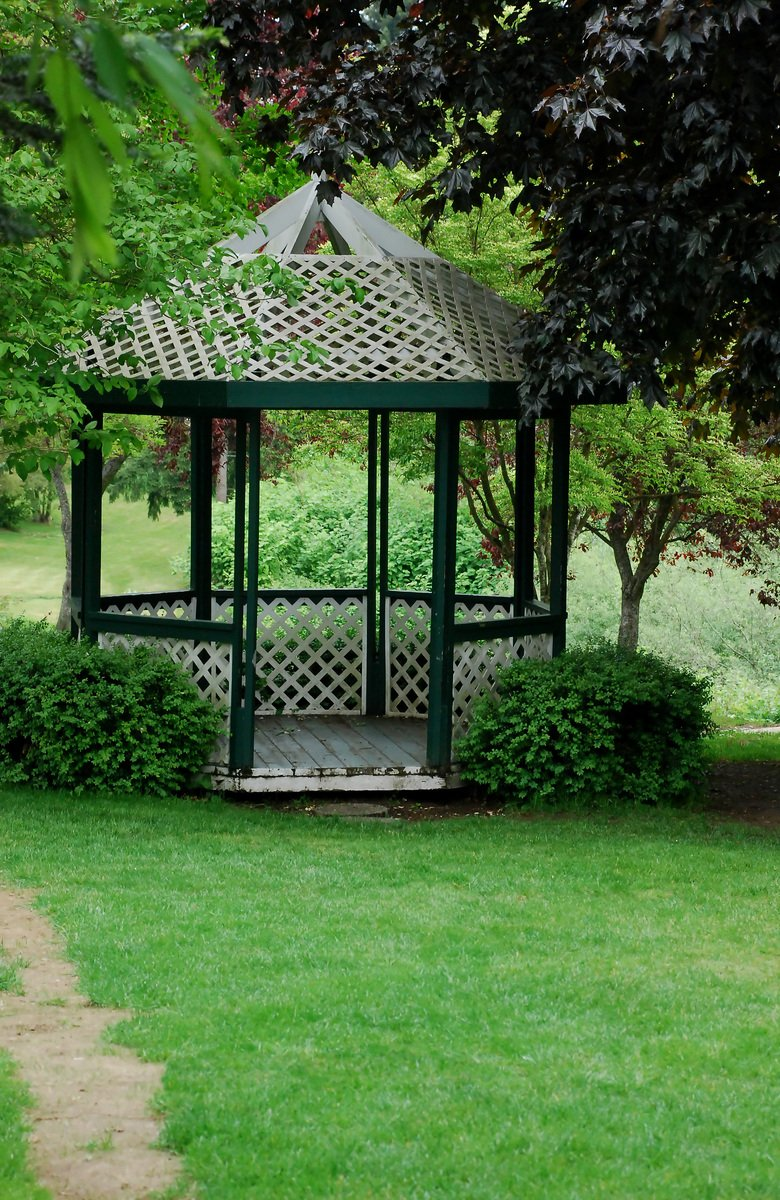

In [3]:
img_arr = cv2.imread('nature.jpg')
cv2_imshow(img_arr)

## Point Operation In Image


A point operation in the form of \(ax + b\) is a linear transformation commonly used for adjusting brightness and contrast in images. The general form of this point operation is:

\[ g(x, y) = a * f(x, y) + b \]

- \( g(x, y) \): Pixel value of the output (transformed) image at coordinates \((x, y)\).
- \( f(x, y) \): Pixel value of the input image at coordinates \((x, y)\).
- \( a \): Contrast adjustment factor.
- \( b \): Brightness adjustment factor.

### Adjustments:

1. **Contrast Adjustment:**
   - \( a > 1 \): Increases contrast.
   - \( 0 < a < 1 \): Decreases contrast.

2. **Brightness Adjustment:**
   - \( b > 0 \): Increases brightness.
   - \( b < 0 \): Decreases brightness.

3. **Combined Brightness and Contrast Adjustment:**
   - Adjusting both \(a\) and \(b\) allows for simultaneous control of contrast and brightness.

### Example:

\[ g(x, y) = 1.2 \* f(x, y) + 30 \]

- \( a = 1.2 \): Increases contrast.
- \( b = 30 \): Increases brightness.

This form of point operation provides a simple and intuitive way to control the visual appearance of an image by scaling the pixel values and shifting them along the intensity scale.


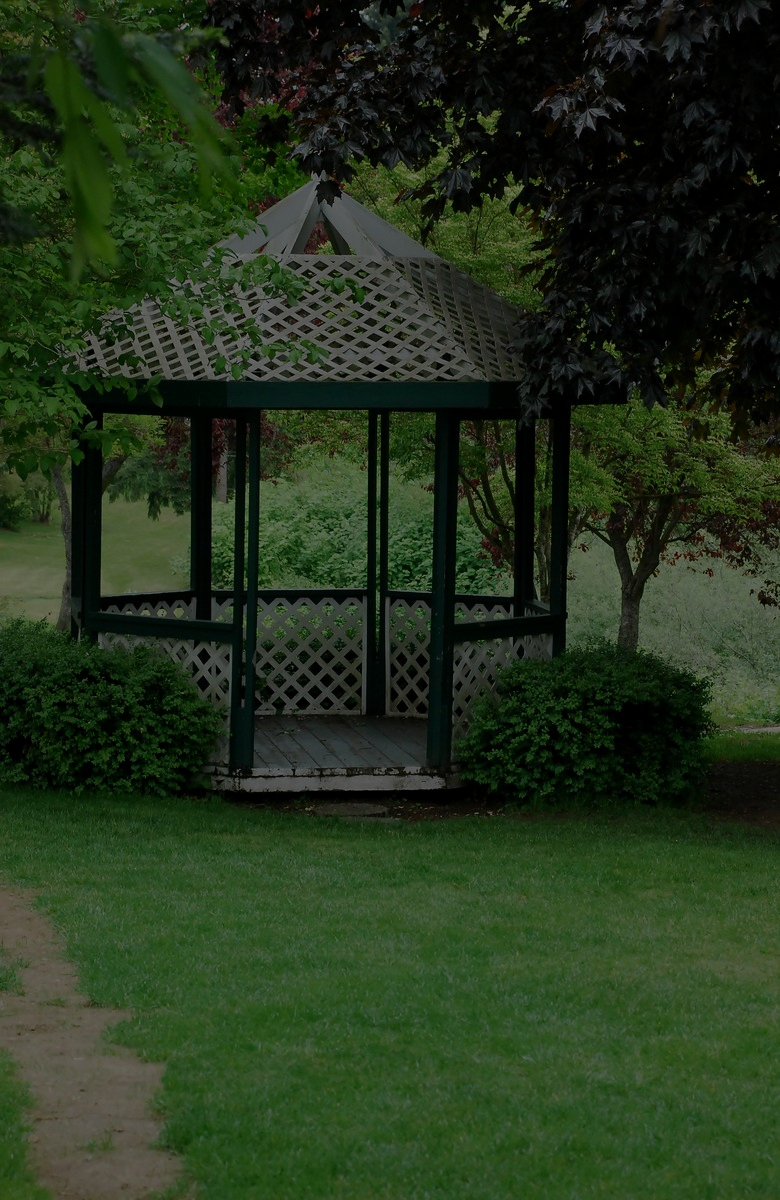

In [4]:
new_img_arr = 0.5*img_arr - 1
cv2_imshow(new_img_arr)

## Image Histogram

An image histogram is a graphical representation that displays the distribution of pixel intensities in an image. It provides valuable insights into the tonal composition, contrast, and overall brightness of the image.

### Components of an Image Histogram:

1. **X-axis:**
   - Represents the range of possible pixel intensity values.
   - Typically ranges from 0 (black) to 255 (white) for grayscale images.

2. **Y-axis:**
   - Represents the frequency or number of pixels at each intensity level.
   - Shows how many pixels in the image have a particular intensity value.

### Key Insights from an Image Histogram:

1. **Contrast:**
   - Wider histograms indicate higher contrast, while narrower histograms suggest lower contrast.

2. **Brightness:**
   - The position of the peak on the histogram reflects the dominant brightness level of the image.

### Applications in Image Processing:

1. **Contrast Enhancement:**
   - Adjusting the spread of intensity values for improved contrast.

2. **Brightness Adjustment:**
   - Analyzing the overall brightness level and making necessary adjustments.

3. **Color Saturation (for Color Images):**
   - Understanding color intensity distribution for color correction.

4. **Histogram Equalization:**
   - Spreading out intensity values to cover the full range for improved image quality.

In summary, image histograms are essential tools in image processing, providing a visual summary of pixel intensity distribution and guiding various enhancement and analysis techniques.


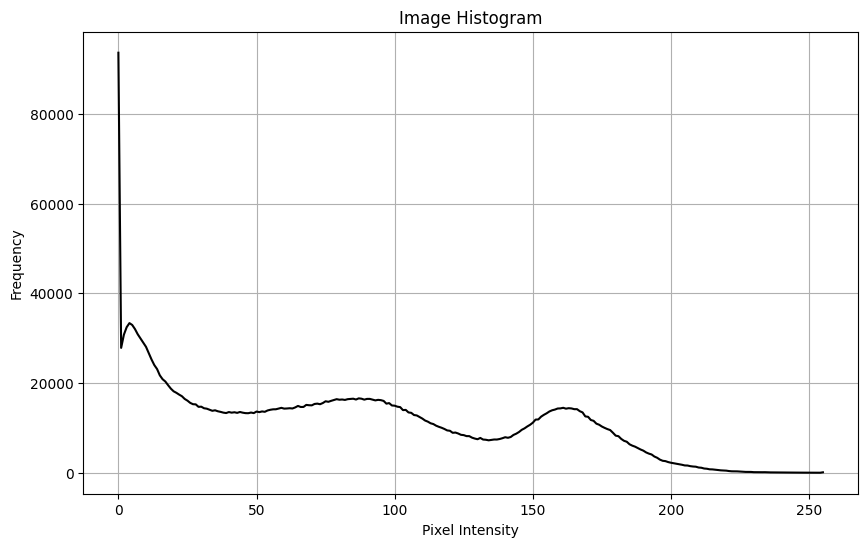

In [6]:
# Calculate the histogram
histogram, bin_edges = np.histogram(img_arr.flatten(), bins=256, range=[0,256])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.plot(histogram, color='black')
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

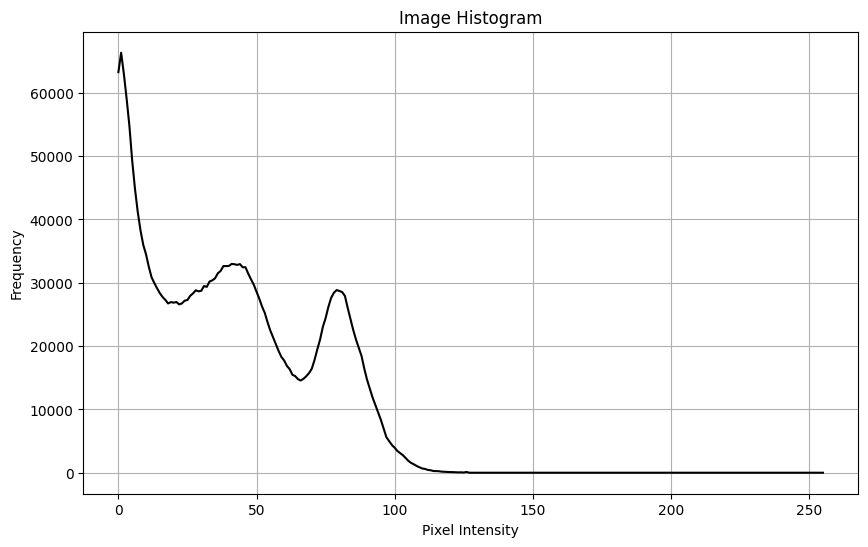

In [8]:

# Calculate the histogram
histogram, bin_edges = np.histogram(new_img_arr.flatten(), bins=256, range=[0,256])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.plot(histogram, color='black')
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Histogram Equalization

- Histogram equalization is a technique used in image processing to enhance the contrast of an image by redistributing pixel intensities across the entire range.
- It is employed to improve the visual appearance of images by making the intensity distribution more uniform, thereby revealing more details.
- Histogram equalization is a process to find an intensity mapping function such that the resulting histogram bins are distributed all over the range, say 0 to 255.
- Histogram equalization fails in areas where there are broad differences in intensity. An example is a binary image.


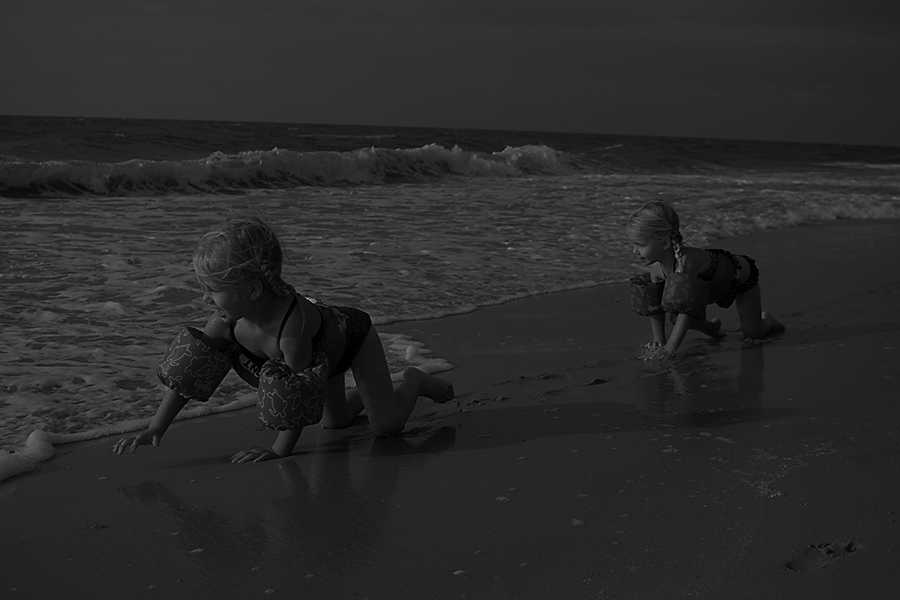

In [9]:
low_bright_img = cv2.imread('low_brightness.jpg')
grayscale_img = cv2.cvtColor(low_bright_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_img)

## Applying Histogram Equalization On this Image

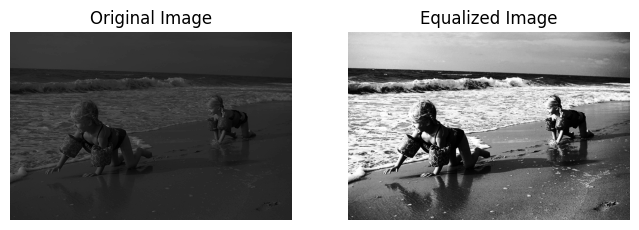

In [10]:
# Perform histogram equalization
equalized_image = cv2.equalizeHist(grayscale_img)

# Display the original and equalized images side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()


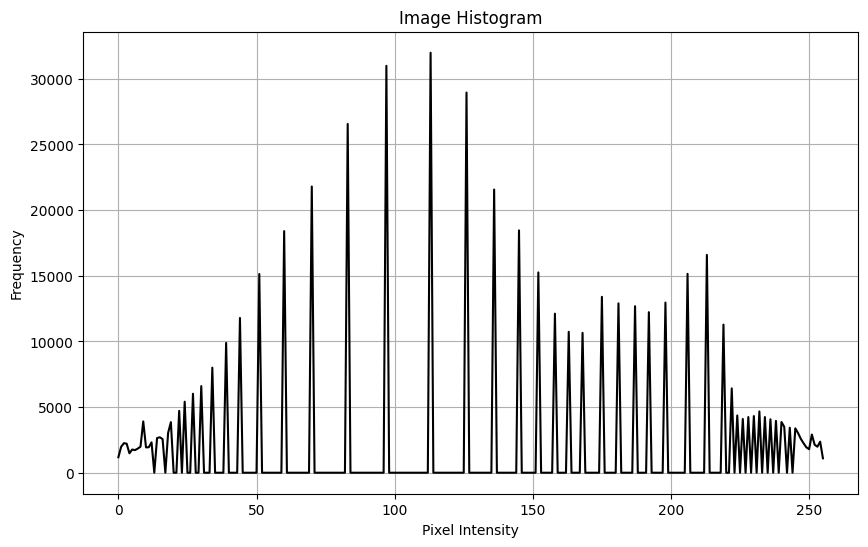

In [11]:

# Calculate the histogram
histogram, bin_edges = np.histogram(equalized_image.flatten(), bins=256, range=[0,256])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.plot(histogram, color='black')
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Image Thresholding

- Image thresholding is a technique used in image processing to segment an image into regions or objects based on pixel intensity.
- The basic idea is to separate the foreground (object of interest) from the background by setting a threshold value.
-Pixels with intensity values above the threshold are assigned to one class, while pixels with values below the threshold are assigned to another class.

There are two main types of image thresholding:

Global Thresholding:

-In global thresholding, a single threshold value is applied to the entire image.
- All pixels with intensities above the threshold are assigned to one class, and those below the threshold are assigned to another class.
- The choice of the threshold is crucial and may require some experimentation or analysis of the image histogram.


Local/Adaptive Thresholding:

- Local or adaptive thresholding takes into account variations in intensity across different regions of the image.
- Instead of using a single global threshold, different thresholds are applied to different regions of the image based on the local characteristics.
- This helps in handling images with varying illumination and contrast.


### Thresholding Methods with 3x3 Input Image

Assume the following 3x3 input image:

| 120 | 150 | 200 |
|-----|-----|-----|
|  50 |  80 | 100 |
| 170 | 210 | 240 |




# GLOBAL THRESHOLDING


1. **THRESH_BINARY:**
   - Pixels with intensity values greater than a certain threshold become white (255), and others become black (0).
   - Example with threshold=150:
     ```
     [0, 255, 255]
     [0, 0, 0]
     [255, 255, 255]
     ```

## Applying Binary Thresholding

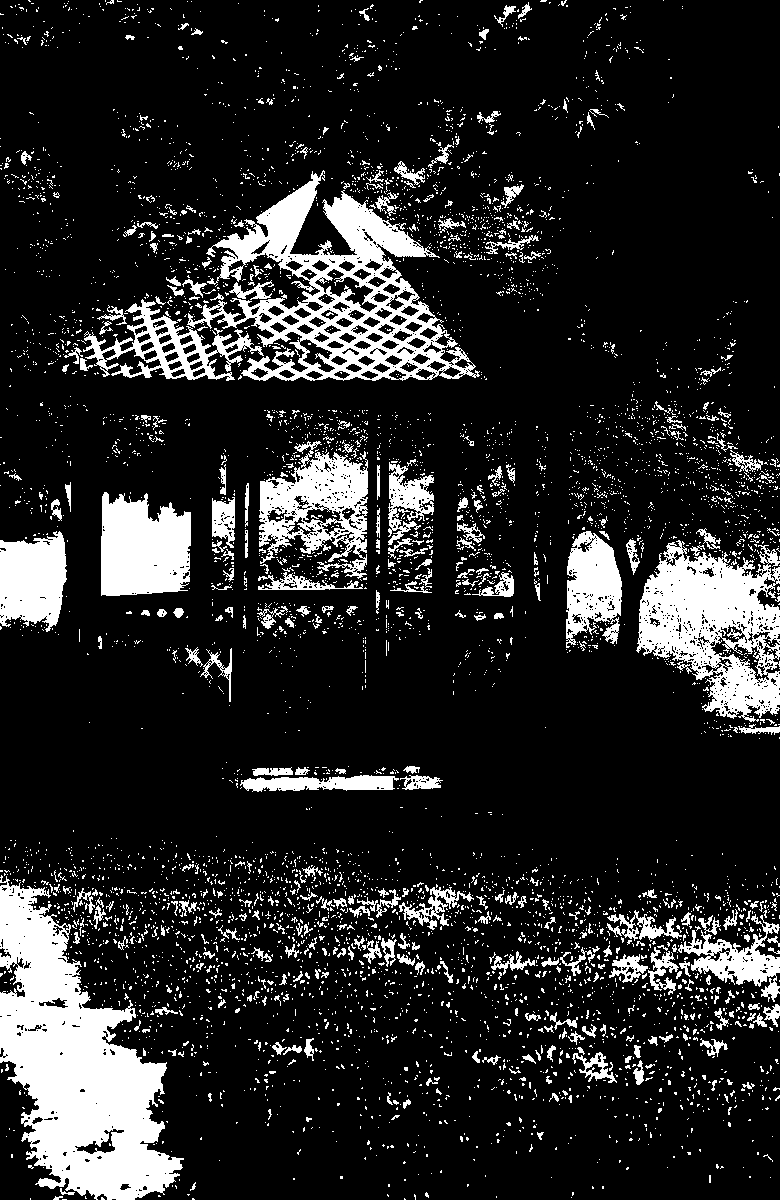

In [12]:
# Apply Binary Thresholding
image = cv2.imread('nature.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_threshold = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_threshold)

2. **THRESH_BINARY_INV:**
   - Inverse of THRESH_BINARY. Pixels with intensity values greater than the threshold become black, and others become white.
   - Example with threshold=150:
     ```
     [255, 0, 0]
     [255, 255, 255]
     [0, 0, 0]
     ```


## Applying Inverse Binary Thresholding

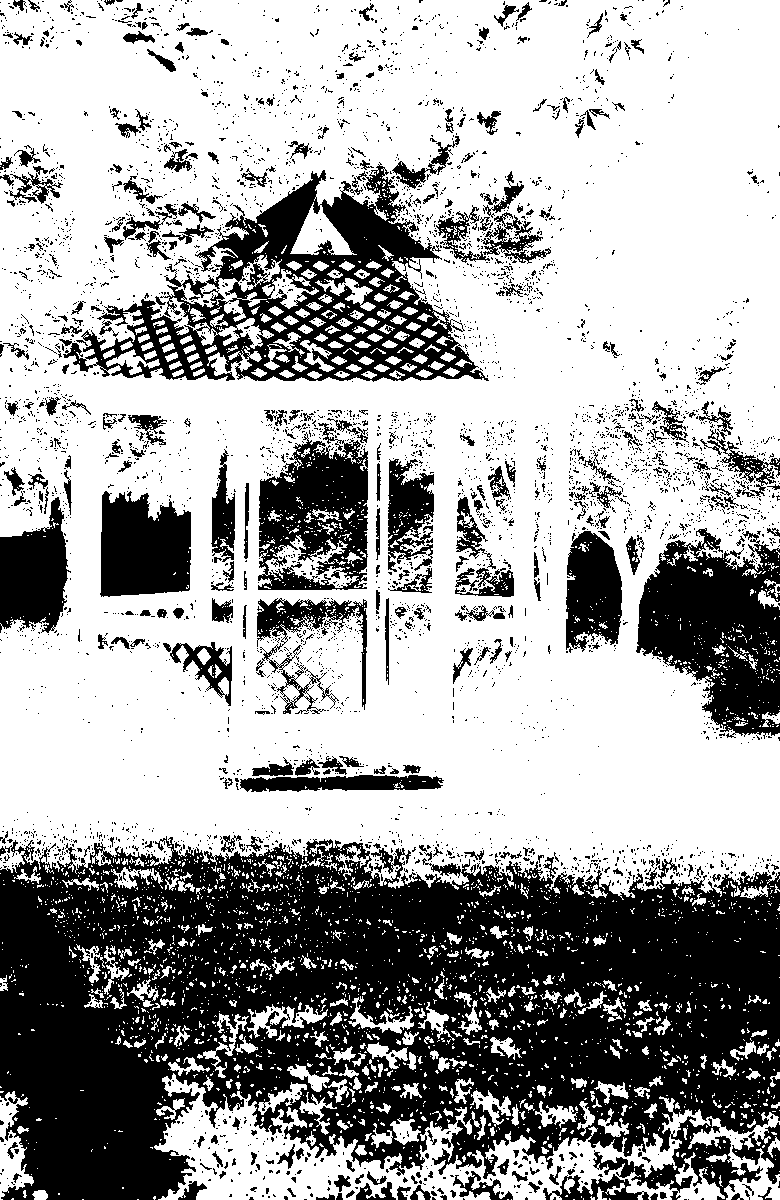

In [13]:
# Apply Inverse Binary Thresholding
_, binary_inv_threshold = cv2.threshold(gray_image, 125, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(binary_inv_threshold)

3. **THRESH_TRUNC:**
   - Pixels with intensity values above the threshold are set to the threshold value, and others remain unchanged.
   - Example with threshold=150:
     ```
     [120, 150, 150]
     [50, 80, 100]
     [150, 150, 150]
     ```



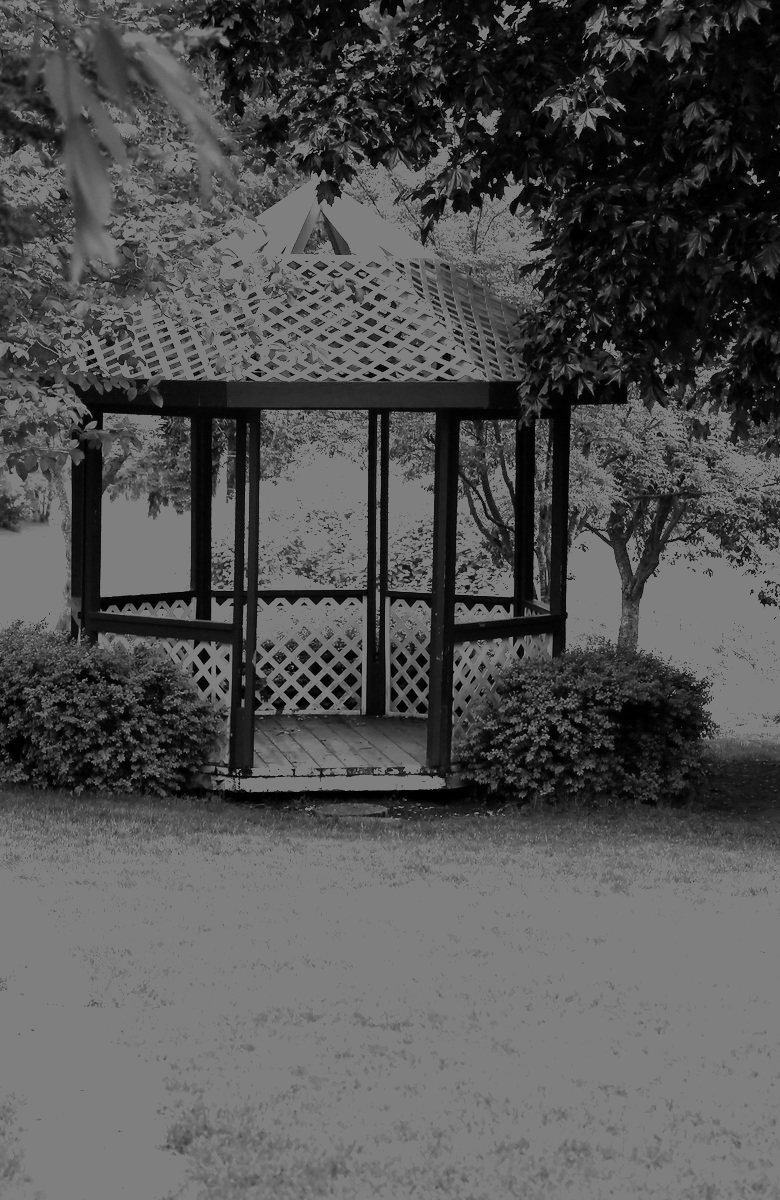

In [14]:
# Apply Truncate Thresholding
_, truncate_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
cv2_imshow(truncate_threshold)

4. **THRESH_TOZERO:**
   - Pixels with intensity values above the threshold remain unchanged, and others are set to zero.
   - Example with threshold=150:
     ```
     [0, 150, 200]
     [0, 0, 0]
     [170, 210, 240]
     ```


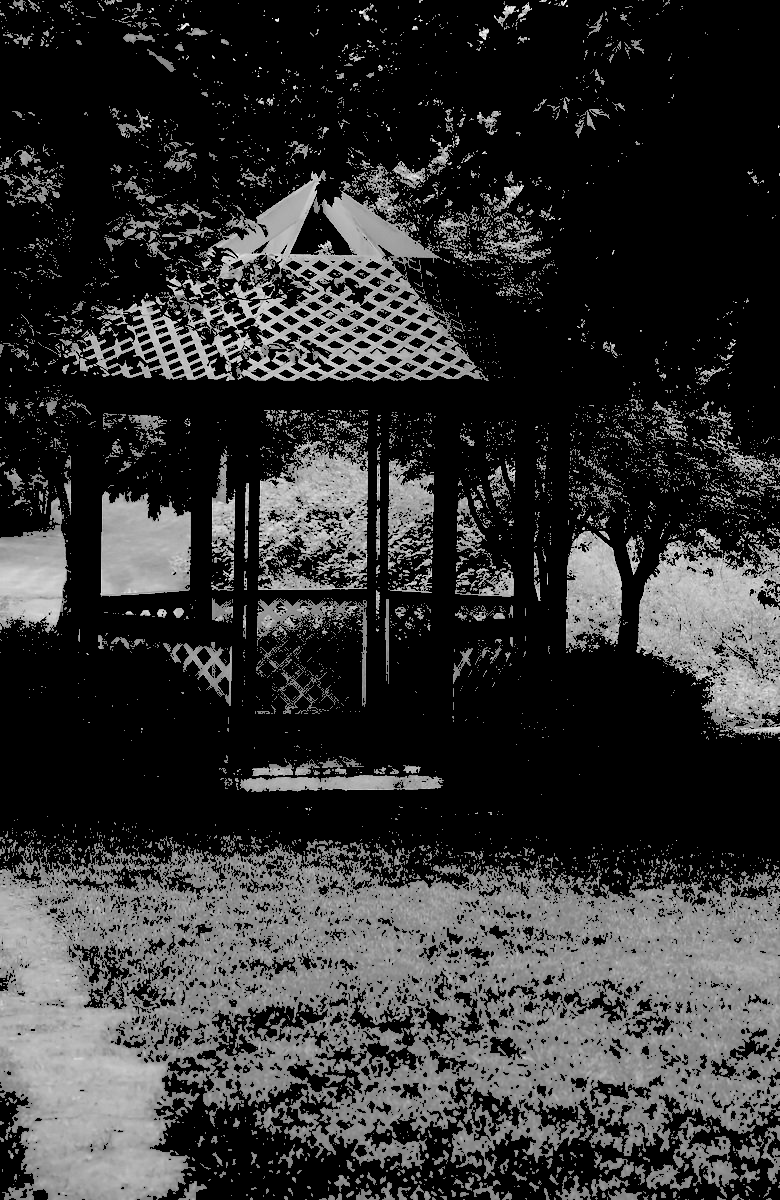

In [15]:
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
cv2_imshow(thresh)


5. **THRESH_TOZERO_INV:**
   - Inverse of THRESH_TOZERO. Pixels with intensity values above the threshold are set to zero, and others remain unchanged.
   - Example with threshold=150:
     ```
     [120, 0, 0]
     [50, 80, 100]
     [0, 0, 0]
     ```


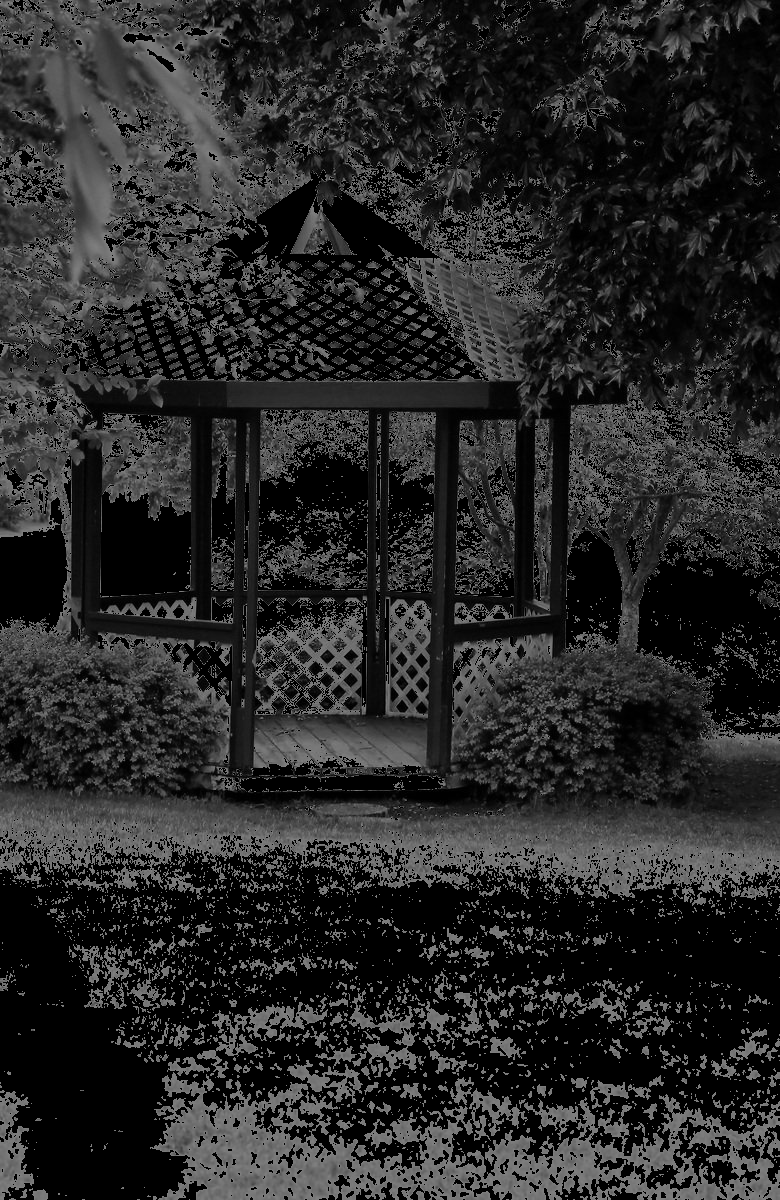

In [16]:
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2_imshow(thresh)

# Edge Detection

In image processing, an "edge" refers to a boundary or transition between two different regions in an image. Detecting edges involves identifying these boundaries, which often represent significant changes in intensity or color. Edge detection is a crucial step in various computer vision tasks, as it helps in:

- **Recognizing Objects:** Edges provide information about the structure and shape of objects.
- **Image Segmentation:** Edges help in dividing an image into meaningful regions.
- **Feature Extraction:** Edges are fundamental features for image analysis.
- **Image Understanding:** Detecting edges contributes to understanding the content and structure of an image.

## Why Edge Detection

1. **Object Recognition:**
   - Edges provide information about the structure and shape of objects.

2. **Image Segmentation:**
   - Edges help in dividing an image into meaningful regions.

3. **Feature Extraction:**
   - Edges are fundamental features for image analysis.

4. **Image Understanding:**
   - Detecting edges contributes to understanding the content and structure of an image.



# Classical Edge Detectors: Robert, Prewitt, Sobel

Classical edge detectors are image processing operators used for edge detection. They calculate the gradient of an image to highlight regions of rapid intensity changes, which typically correspond to edges. Here are examples of three classical edge detectors: Robert, Prewitt, and Sobel.

## Robert Operator

The Robert operator uses a pair of 2x2 convolution kernels to approximate the gradient and detect edges.
The Roberts Cross operator consists of two 2x2 convolution kernels:

\[ G_x = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \]

\[ G_y = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \]

These kernels are applied to the image to compute the gradients in the horizontal (\(G_x\)) and vertical (\(G_y\)) directions, respectively. The magnitude of the gradient (\(G\)) is then calculated as:

\[ G = sqrt{G_x^2 + G_y^2} \]

This magnitude represents the strength of the edge at each pixel, and the resulting image can be used to highlight edges in the original image.


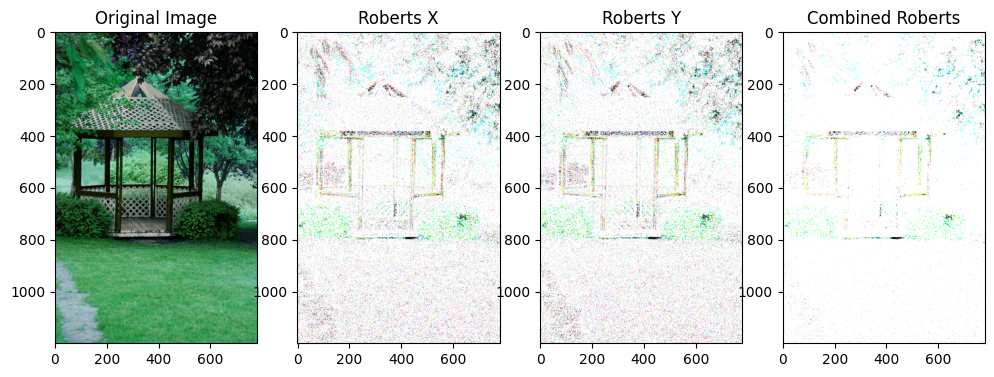

In [17]:
imge = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)
# Apply Roberts Cross operator
roberts_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0], [0, 1]]))
roberts_y = cv2.filter2D(image, cv2.CV_64F, np.array([[0, -1], [1, 0]]))

# Combine the results
magnitude = np.sqrt(roberts_x**2 + roberts_y**2)

# Plot the original and edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(np.abs(roberts_x), cmap='gray')
plt.title('Roberts X')

plt.subplot(1, 4, 3)
plt.imshow(np.abs(roberts_y), cmap='gray')
plt.title('Roberts Y')

plt.subplot(1, 4, 4)
plt.imshow(magnitude, cmap='gray')
plt.title('Combined Roberts')

plt.show()


## Prewitt Operator
The Prewitt operator is an edge detection operator that employs two 3x3 convolution kernels:

\[ G_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} \]

\[ G_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} \]

These kernels are applied to the image to compute the gradients in the horizontal (\(G_x\)) and vertical (\(G_y\)) directions, respectively. The magnitude of the gradient (\(G\)) is then calculated as:

\[ G = sqrt{G_x^2 + G_y^2} \]

This magnitude represents the strength of the edge at each pixel, and the resulting image can be used to highlight edges in the original image.


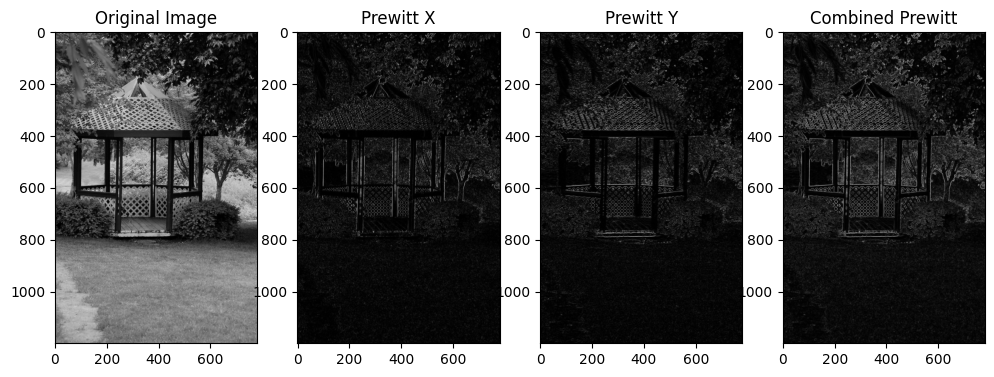

In [19]:
# Read an image in grayscale
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Prewitt operator kernels
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

# Apply Prewitt operator
prewitt_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
prewitt_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

# Calculate the magnitude of the gradients
magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Display the original and Prewitt images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(np.abs(prewitt_x), cmap='gray')
plt.title('Prewitt X')

plt.subplot(1, 4, 3)
plt.imshow(np.abs(prewitt_y), cmap='gray')
plt.title('Prewitt Y')

plt.subplot(1, 4, 4)
plt.imshow(magnitude, cmap='gray')
plt.title('Combined Prewitt')

plt.show()


## Sobel Operator
The Sobel operator is an edge detection operator that utilizes two 3x3 convolution kernels:

\[ G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} \]

\[ G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} \]

These kernels are applied to the image to compute the gradients in the horizontal (\(G_x\)) and vertical (\(G_y\)) directions, respectively. The magnitude of the gradient (\(G\)) is then calculated as:

\[ G = sqrt{G_x^2 + G_y^2} \]

This magnitude represents the strength of the edge at each pixel, and the resulting image can be used to highlight edges in the original image.


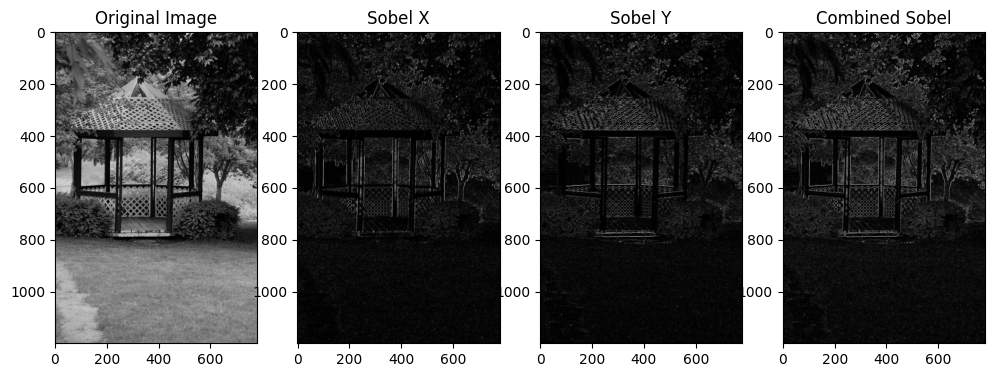

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image in grayscale
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel operator kernels
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

# Apply Sobel operator
sobel_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
sobel_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

# Calculate the magnitude of the gradients
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the original and Sobel images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 4, 3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Y')

plt.subplot(1, 4, 4)
plt.imshow(magnitude, cmap='gray')
plt.title('Combined Sobel')

plt.show()


## Canny Edge Detector

The Canny edge detector is a multi-stage algorithm for detecting edges in images. The key steps of the Canny edge detection process are as follows:

1. **Gaussian Smoothing:**
   - The input image is convolved with a Gaussian kernel to reduce noise and smooth the image.
  
2. **Intensity Gradient Calculation:**
   - The gradients of the image in both the horizontal (\(G_x\)) and vertical (\(G_y\)) directions are computed using convolution with Sobel operators:
     \[ G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} \]
     \[ G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} \]
   - The gradient magnitude (\(G\)) and orientation (\(\theta\)) are calculated for each pixel.

3. **Non-Maximum Suppression:**
   - Local maxima are identified in the gradient magnitude image, and non-maximum values are suppressed. This helps thinning the edges.

4. **Edge Tracking by Hysteresis:**
   - Pixels are categorized as strong, weak, or non-relevant based on gradient magnitudes and thresholds.
   - Strong edges are considered definite edges, weak edges are potential edges, and non-relevant pixels are unlikely to be part of an edge.
   - A connectivity analysis is performed on the weak edges, and those connected to strong edges are considered part of the final edge map.

The Canny edge detector is known for its ability to detect edges accurately while suppressing noise. It is widely used in computer vision applications.

)


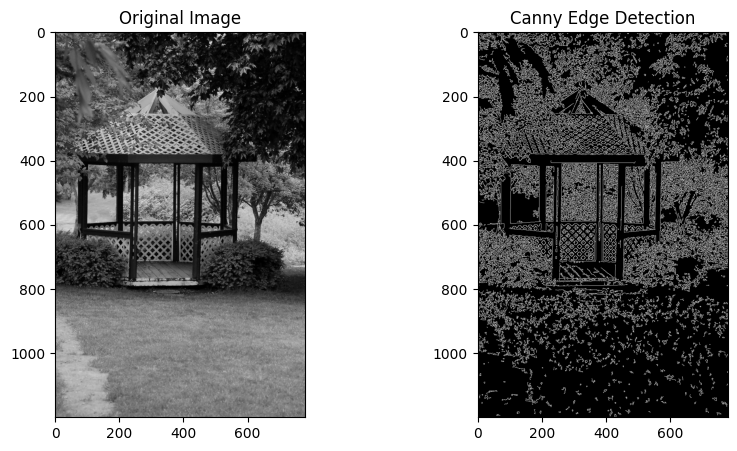

In [21]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 70, 180)  # Adjust the thresholds as needed

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

## Image Segmentation

- Image segmentation is a fundamental task in computer vision that involves dividing an image into distinct regions or segments based on certain visual properties.
- The primary goal is to simplify the representation of an image, making it more manageable for further analysis.
- Image segmentation finds applications in various fields, including object recognition, medical imaging, and autonomous vehicles.

### Types of Image Segmentation

1. **Semantic Segmentation:**
   - **Description:** Assigns a class label to each pixel, categorizing the image into meaningful parts such as "road," "sky," or "person."

2. **Instance-Based Segmentation:**
   - **Description:** Identifies and delineates individual instances of objects in an image, assigning a unique label to each instance.

3. **Panoptic Segmentation:**
   - **Description:** Unifies semantic and instance segmentation, providing a holistic understanding of the scene by assigning unique labels to stuff (e.g., road, sky) and individual object instances.

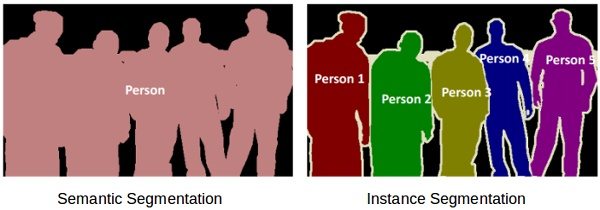

- These advanced segmentation techniques offer more nuanced insights into image content and are widely used in applications requiring precise object delineation and scene understanding.


In [22]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


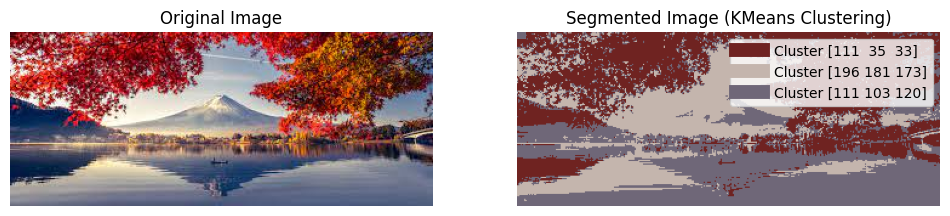

In [28]:
# Load the image
img = cv2.imread('segmentation.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixels = img.reshape((-1, 3))

# Define the number of clusters (you can adjust this based on your specific use case)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

# Assign each pixel to its corresponding cluster center
segmented_image = kmeans.cluster_centers_[kmeans.labels_].reshape(img.shape)

# Assign unique colors to each cluster center
cluster_colors = kmeans.cluster_centers_.astype(int)

# Display the original and segmented images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (KMeans Clustering)')
plt.imshow(segmented_image.astype(np.uint8))

# Display the unique colors for each cluster
for color in cluster_colors:
    plt.plot([0, 0], label=f'Cluster {color}', color=color / 255.0, linewidth=10)

plt.axis('off')
plt.legend(loc='upper right')
plt.show()
